### Standby Diesel Generator operation based on Energy Supply and Demand

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
a = pd.read_excel("/home/pranavavn/Documents/dev/ee19614/dieselGenerator/program_4_dataset.xlsx")
a.head()

,month,load(MW),class
0,4,40,no
1,6,5,no
2,7,80,no
3,10,100,no
4,12,120,no


In [18]:
b = {'no':0, 'yes': 1}
a['class'] = a['class'].map(b)
x = a[['month', 'load(MW)']]
y = a[['class']]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train.values.ravel())
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Accuracy Score: 1.0
Mean Squared Error: 0.0


In [22]:
from sklearn.metrics import confusion_matrix
y_true = y_test
data = confusion_matrix(y_true, y_pred)
data

array([[2, 0],
       [0, 1]])

In [24]:
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (3,3))
sns.set(font_scale=1.2)#for label size
df_cm

Predicted,0,1
Actual,,
0,2,0
1,0,1


<Figure size 300x300 with 0 Axes>

<Axes: xlabel='Predicted', ylabel='Actual'>

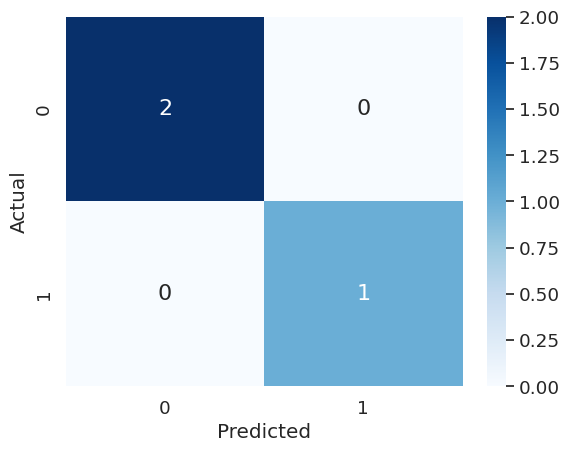

In [26]:
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [29]:
new_month = 20
new_load = 120
new_pred = clf.predict([[new_month, new_load]])
print(new_pred[0])

0


/home/pranavavn/Documents/dev/ee19614/lib64/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
new_month = 20
new_load = 300
new_pred = clf.predict([[new_month, new_load]])
print(new_pred[0])

1


/home/pranavavn/Documents/dev/ee19614/lib64/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
